# Dataset Eigenvalue Distribution

In this notebook, we investigate the eigenvalue distribution of different datasets

In [1]:
import os
import sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import torch
import kymatio as km
from  matplotlib import pyplot as plt

sys.path.append("..")

from lib.data.data_loading import ClassificationDataset
from lib.dimensionality_reduction.dimensionality_reduction import compute_eigendecomposition 
from lib.data.data_processing import convert_images_to_scat, convert_loader_to_scat
from lib.utils.visualizations import display_subset_data, display_cluster_features
from CONFIG import CONFIG

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
ROOT_PATH = os.path.dirname(os.path.dirname(os.getcwd()))
DATA_PATH = os.path.join(ROOT_PATH, "data")
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Auxiliary Methods

In [4]:
def get_class_data(data, labels, class_id=0):
    """
    Getting all samples belonging to class 'class_id'
    """
    
    idx = np.where(labels == class_id)[0]
    class_data = data[idx]
    return class_data

In [5]:
# defining the scattering network
J = 3  # spatial field of the kernel is 2**J 
L = 6  # number of angles in the kernel
shape = (32,32)  # shape of the input images
max_order = 2 # depth of the network
scattering_layer = km.Scattering2D(J=J, shape=shape, max_order=max_order, L=L)
if DEVICE.type == 'cuda':
    scattering_layer = scattering_layer.cuda()

# MNIST Dataset

In [6]:
dataset = ClassificationDataset(data_path=DATA_PATH, dataset_name="mnist", valid_size=0.20) 
valid_loader = dataset.get_data_loader(split="valid", batch_size=128)

In [7]:
imgs, data, labels = convert_loader_to_scat(valid_loader, scattering=scattering_layer,
                                            device=DEVICE, equalize=True, verbose=1)

100%|██████████| 94/94 [00:14<00:00,  6.60it/s]


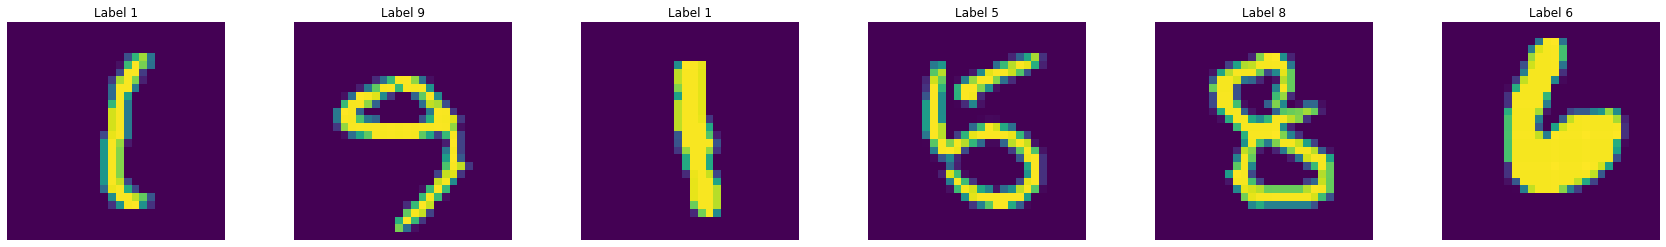

In [8]:
display_subset_data(imgs, labels, shuffle=True)

In [9]:
class_data_3 = get_class_data(data=data, labels=labels, class_id=3)[:1000]
class_data_6 = get_class_data(data=data, labels=labels, class_id=6)[:1000]

In [10]:
eigenvalues_3, _ = compute_eigendecomposition(class_data_3)
eigenvalues_6,_ = compute_eigendecomposition(class_data_6)

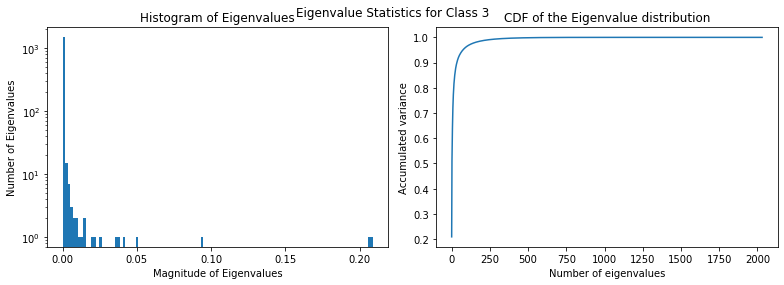

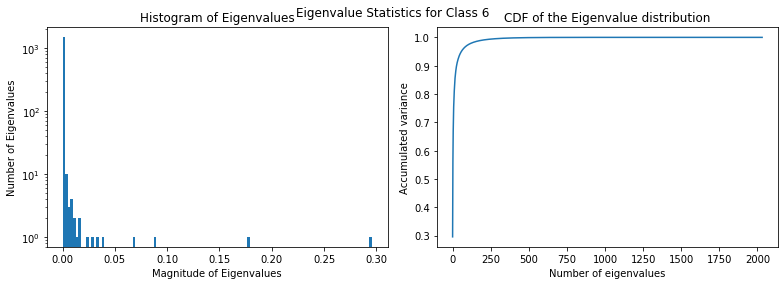

In [11]:
display_cluster_features(eigenvalues_3, suptitle="Eigenvalue Statistics for Class 3")
display_cluster_features(eigenvalues_6, suptitle="Eigenvalue Statistics for Class 6")

# Fashion MNIST

In [13]:
dataset = ClassificationDataset(data_path=DATA_PATH, dataset_name="fashion_mnist", valid_size=0.20) 
valid_loader = dataset.get_data_loader(split="valid", batch_size=128)

In [14]:
imgs, data, labels = convert_loader_to_scat(valid_loader, scattering=scattering_layer,
                                            device=DEVICE, equalize=True, verbose=1)

100%|██████████| 94/94 [00:15<00:00,  6.15it/s]


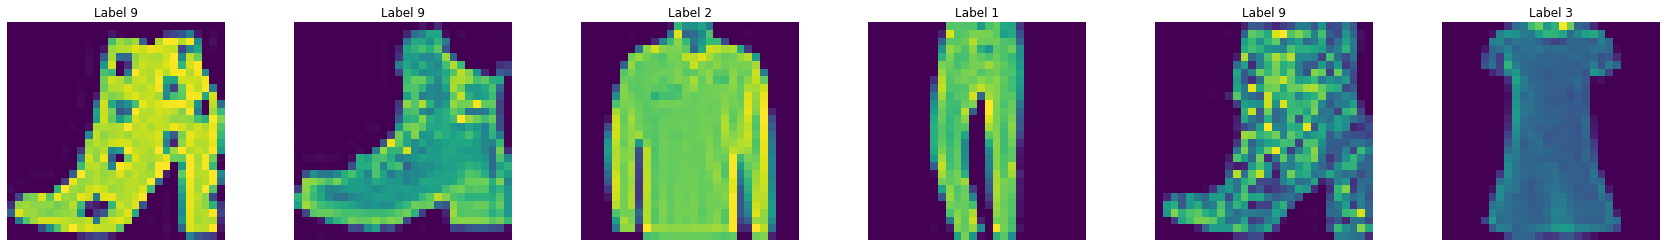

In [15]:
display_subset_data(imgs, labels, shuffle=True)

In [18]:
class_data_0_scat = get_class_data(data=data, labels=labels, class_id=0)[:1000]
class_data_1_scat = get_class_data(data=data, labels=labels, class_id=1)[:1000]
class_data_0_imgs = get_class_data(data=imgs, labels=labels, class_id=0)[:1000]
class_data_1_imgs = get_class_data(data=imgs, labels=labels, class_id=1)[:1000]

In [19]:
eigenvalues_0_scat, _ = compute_eigendecomposition(class_data_0_scat)
eigenvalues_1_scat,_ = compute_eigendecomposition(class_data_1_scat)
eigenvalues_0_imgs, _ = compute_eigendecomposition(class_data_0_imgs)
eigenvalues_1_imgs,_ = compute_eigendecomposition(class_data_1_imgs)

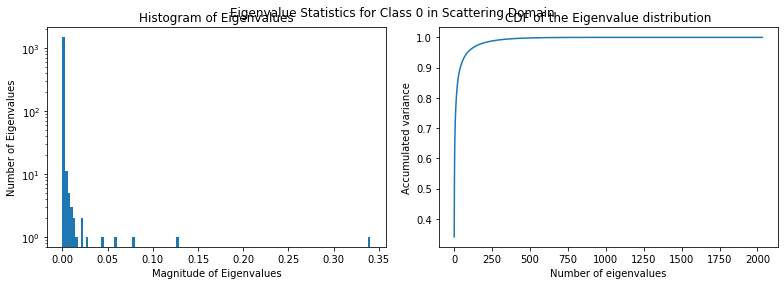

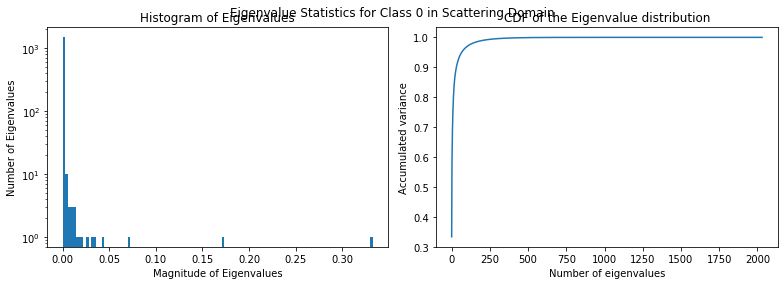

In [22]:
display_cluster_features(eigenvalues_0_scat, suptitle="Eigenvalue Statistics for Class 0 in Scattering Domain")
display_cluster_features(eigenvalues_1_scat, suptitle="Eigenvalue Statistics for Class 0 in Scattering Domain")